In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/linkedin-canada-data-science-jobs-2024/linkedin_canada.csv')

In [3]:
df.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering


In [4]:
df.shape

(275, 13)

### Check Null Values

In [5]:
df.isna().sum()

applicationsCount      0
companyId              1
companyName            1
contractType          11
description            0
experienceLevel        0
location               0
postedTime             0
publishedAt            5
salary               262
sector                11
title                  0
workType              11
dtype: int64

### Check Duplicated Values

In [6]:
df.duplicated().sum()

0

## Percentage of Null Values in Salary Column

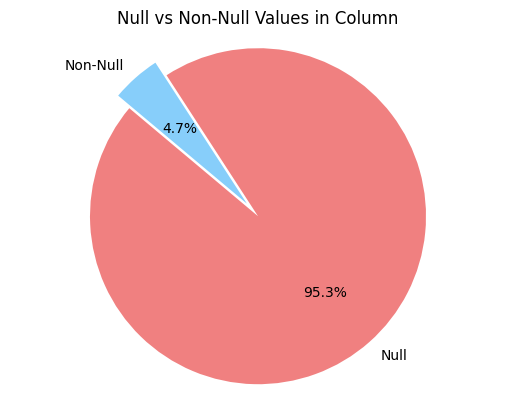

In [7]:
null_count = df['salary'].isnull().sum()
non_null_count = df['salary'].notnull().sum()
labels = ['Null', 'Non-Null']
sizes = [null_count, non_null_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Null vs Non-Null Values in Column')
plt.show()


## Top company by posting jobs

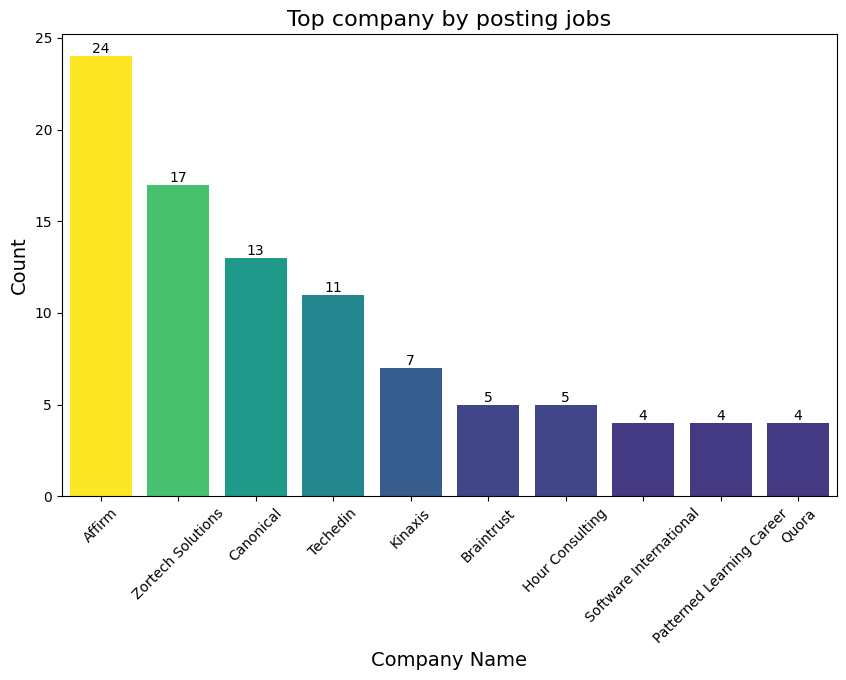

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
topFive_company = df['companyName'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=topFive_company.index, y=topFive_company.values, color='skyblue',saturation=0.5)
for bar in ax.patches:
    bar.set_facecolor(plt.cm.viridis(bar.get_height() / max(topFive_company.values)))
ax.bar_label(ax.containers[0])
plt.title('Top company by posting jobs', fontsize=16)
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

plt.show()


## Distribution of Job by Contract Types

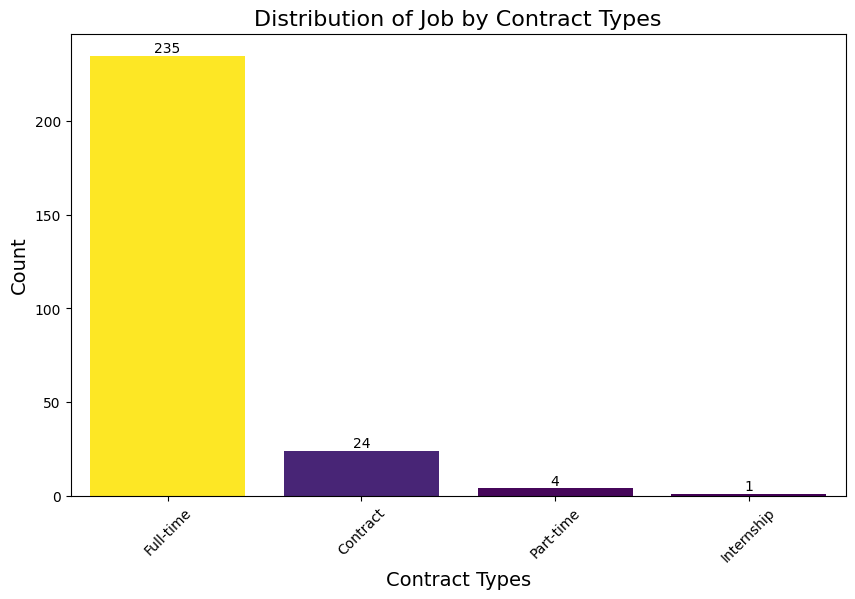

In [9]:
contract_type = df['contractType'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=contract_type.index, y=contract_type.values, color='skyblue',saturation=0.5)
for bar in ax.patches:
    bar.set_facecolor(plt.cm.viridis(bar.get_height() / max(contract_type.values)))
ax.bar_label(ax.containers[0])
plt.title('Distribution of Job by Contract Types', fontsize=16)
plt.xlabel('Contract Types', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


## Distribution of Job by Experience Level

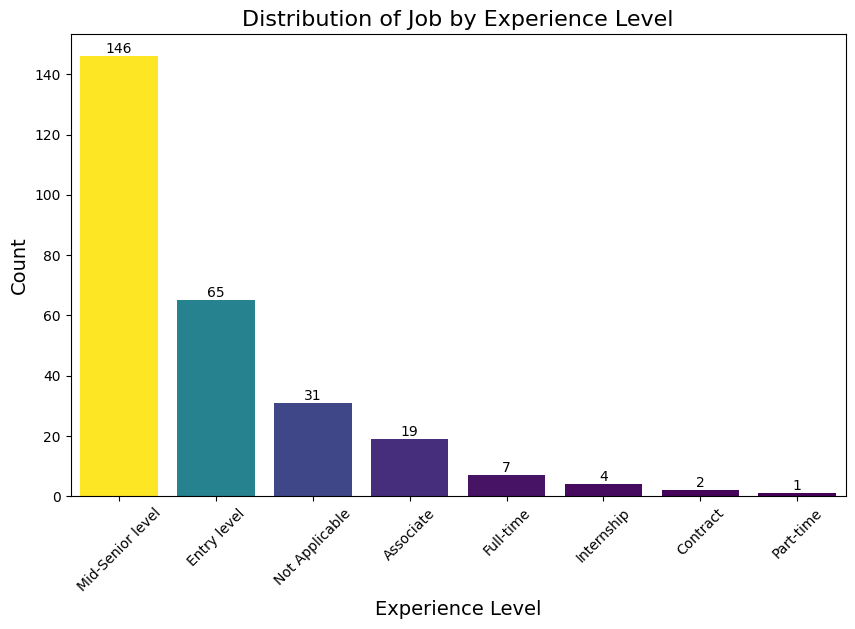

In [10]:

experienceLevel = df['experienceLevel'].value_counts()
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=experienceLevel.index, y=experienceLevel.values, color='skyblue',saturation=0.5)
for bar in ax.patches:
    bar.set_facecolor(plt.cm.viridis(bar.get_height() / max(experienceLevel.values)))
ax.bar_label(ax.containers[0])
plt.title('Distribution of Job by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


## Distribution of Application Count

In [11]:
df['applicationsCount']=df['applicationsCount'].str.extract('(\d+)').astype(int)


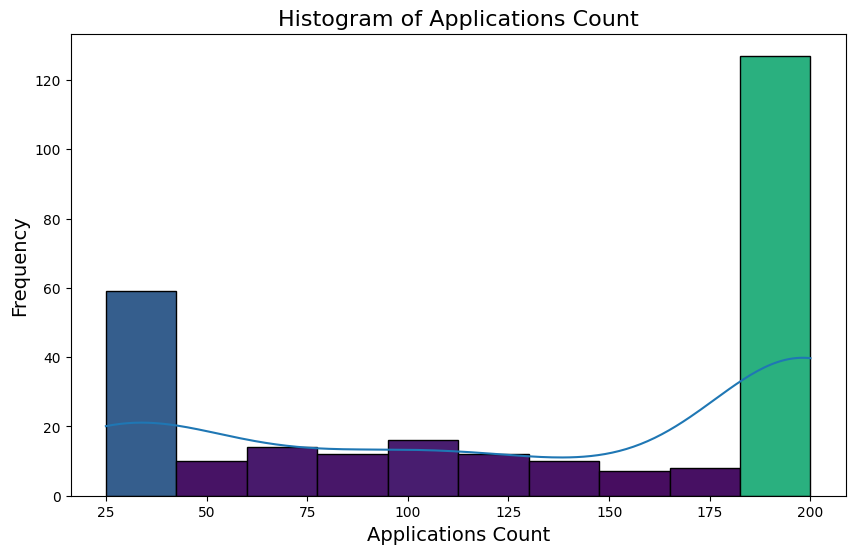

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['applicationsCount'], kde=True)

for bar in ax.patches:
    bar.set_facecolor(plt.cm.viridis(bar.get_height() / max(df['applicationsCount'])))
ax.bar_label(ax.containers[0])

plt.title('Histogram of Applications Count', fontsize=16)
plt.xlabel('Applications Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


## Distribution of Job by Publishing Time

In [13]:
df['publishedAt']=pd.to_datetime(df['publishedAt'])

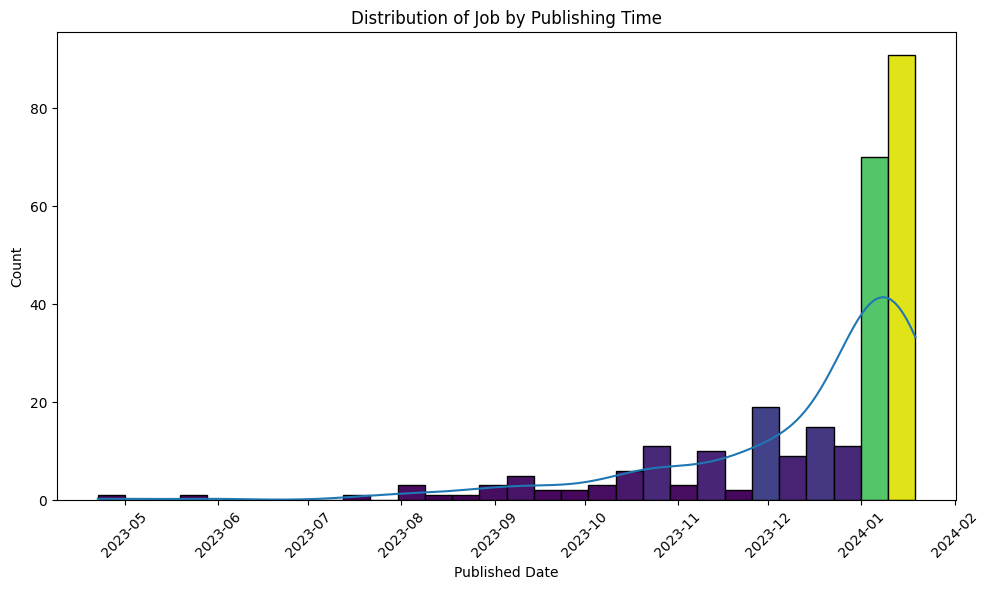

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['publishedAt'], bins=30, kde=True)

max_height = ax.get_ylim()[1]
for bar in ax.patches:
    bar.set_facecolor(plt.cm.viridis(bar.get_height() / max_height))
plt.title('Distribution of Job by Publishing Time')
plt.xlabel('Published Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Word Cloud of Job Description

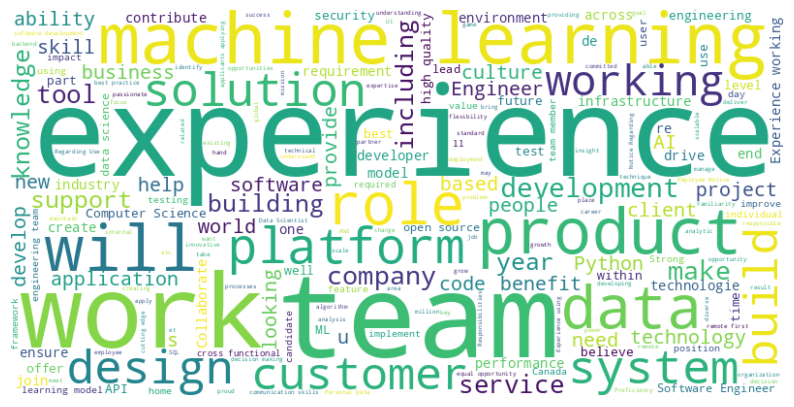

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [16]:
def convert_to_days(time_str):
    value, unit,k = time_str.split(' ')
    value = int(value)
    if 'week' in unit:
        return value * 7
    elif 'month' in unit:
        return value * 30
    elif 'day' in unit:
        return value
    elif 'hour' in unit:
        return value / 24

def exact_location(location_str):
    parts=location_str.split(', ')
    return parts[0]


In [17]:
df['postedTime_DaysAgo'] = df['postedTime'].apply(convert_to_days)
df['location']=df['location'].apply(exact_location)

## Distribution of jobs by Location


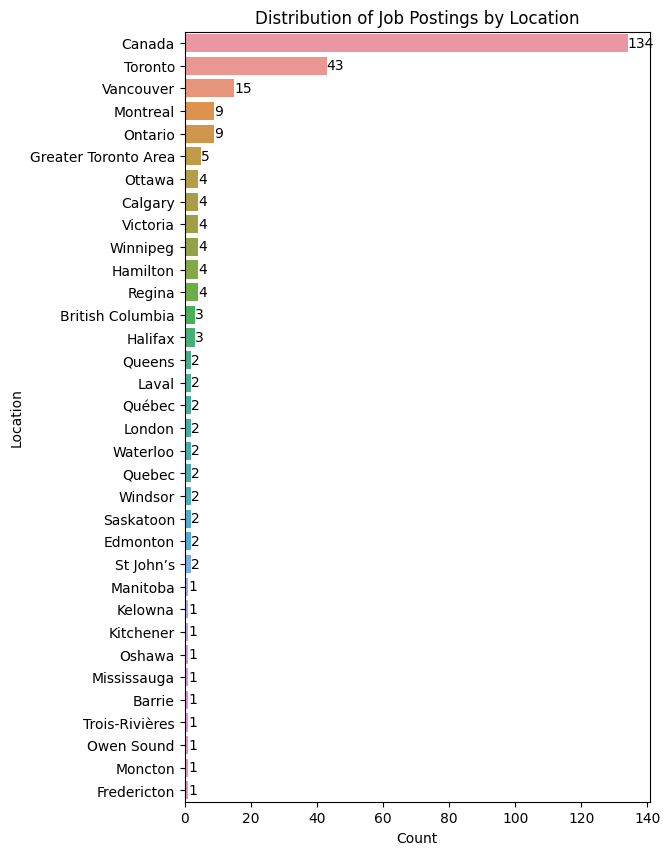

In [18]:
plt.figure(figsize = (6, 10))
ax=sns.countplot(y='location', data=df, order=df['location'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Job Postings by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

## Distribution of Job Postings by title

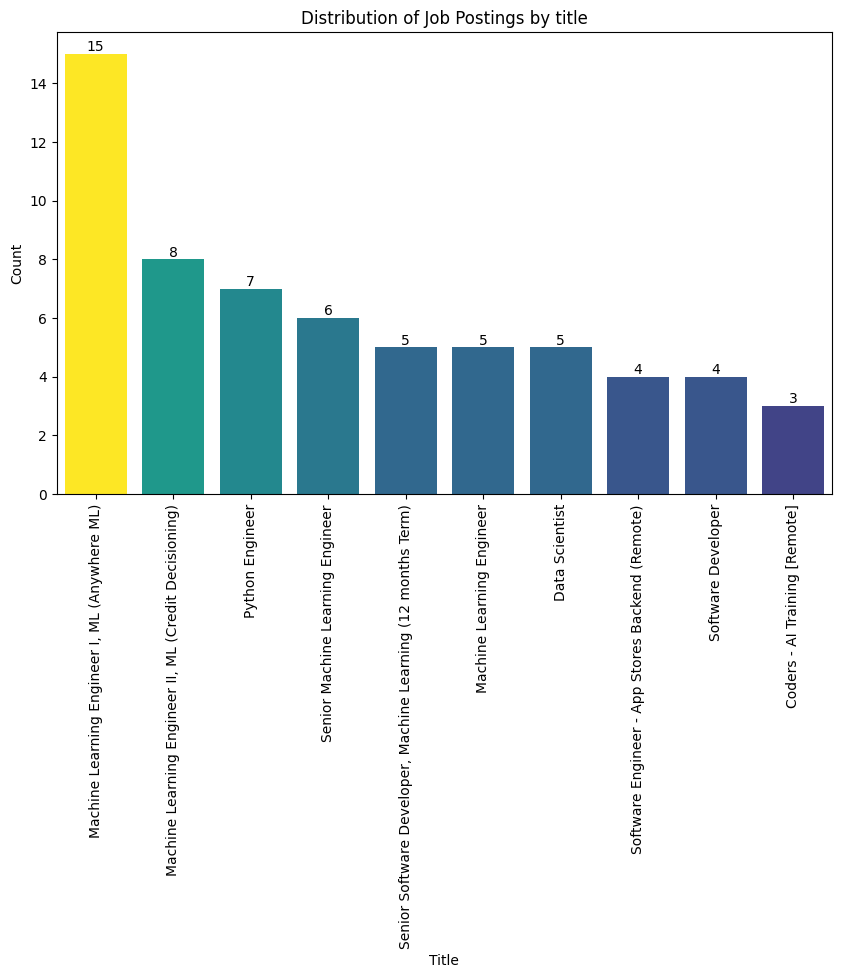

In [19]:

top_title = df['title'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=top_title.index, y=top_title.values, color='skyblue',saturation=0.5)
for bar in ax.patches:
    bar.set_facecolor(plt.cm.viridis(bar.get_height() / max(top_title.values)))
ax.bar_label(ax.containers[0])
plt.title('Distribution of Job Postings by title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()
